In [1]:
import time
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from sklearn_extra.cluster import KMedoids

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import estimate_bandwidth
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from konlpy.tag import Komoran

import pandas_datareader as pdr
from datetime import datetime

from scipy.cluster.hierarchy import linkage 
from scipy.cluster.hierarchy import dendrogram 

from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw

import scipy.spatial.distance as ssd

from gensim.models import Word2Vec as w_to_v

C:\Users\pc\anaconda3\envs\dm_project\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)
C:\Users\pc\anaconda3\envs\dm_project\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


In [23]:
df = pd.read_csv('./df.csv', encoding = 'euc-kr')
df_price = pd.read_pickle('./price_normal.fkl')
df_dtw_matrix = pd.read_pickle('./dtw_matrix.fkl')

df_finance = pd.read_pickle('./financial_i_log_categoric.fkl')
df_price = df_price.dropna(axis = 0)

In [ ]:
# 기업개요

In [9]:
#TFidf 변환 및 KMeans 학습

countvectorizer = CountVectorizer(stop_words=['1월', '1일','2월','3월','4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월', '12월', 'M', 'co', 'company', 'global', 'inc', '가능', '가능', '가치', '각종', 
                                              '감소', '강화', '개', '개선', '개시', '개요', '거점', '결과', '결정', '경영', 
                                              '경우', '경쟁력', '계속', '계획', '공시', '과정', '관련', '관리', '구분', 
                                              '구성', '구조', '구축', '국가', '국내', '국내외', '규모', '극대', '글로벌', 
                                              '기간', '기능', '기대', '기록', '기반', '기업', '기존', '기준', '기초',
                                              '기타', '기회', '내용', '노력', '누적', '능력', '다각', '다수', '다양', '다음',
                                              '단계', '단위', '단일', '달성', '담당', '당기', '당사', '대비', '대상', '대응',
                                              '도약', '도입', '동기', '동력', '동사', '동시', '드', '등', '마련', '매출', 
                                              '매출액', '목적', '목표', '및', '바탕', '반기', '반영', '방식', '법인', '변경',
                                              '변동', '변화', '별도', '보수', '보호', '부가', '부문', '부분', '분기', '분류',
                                              '분야', '비용', '비중', '사업', '사업장', '사용', '사항', '상기', '상반기', 
                                              '상승', '상장', '상호', '상황', '선도', '설계', '설립', '설비', '성격', '성장',
                                              '세계', '소유', '수요', '수익', '수준', '수출', '수행', '시작', '시장', '시행',
                                              '실적', '아래', '안정', '업무', '업체', '역량', '역할', '연간', '연결', '영역', 
                                              '영업', '영위', '영향', '예상', '예정', '완료', '요구', '요약', '요인', '우수', 
                                              '우위', '운영', '위주', '위치', '유가증권', '유지', '의', '이상', '이익', '이하', 
                                              '이후', '일반', '일부', '임대', '입지', '자금', '자본', '자산', '자체', '작성', 
                                              '장기', '장벽', '장점', '재무', '적극', '적용', '전개', '전년', '전년 동기', 
                                              '전략', '전망', '전문', '전반', '전체', '점유', '제고', '제외', '제품', '조정', '조직', 
                                              '종속', '종합', '주', '주도', '주력', '주식', '주식회사', '주요', '준비', '중심',
                                              '중요', '증가', '증대', '지배', '지분', '지속', '지역', '지원', '지위', '지주',
                                              '지주회사', '진행', '집중', '차별', '차지', '참고', '참여', '참조', '창출',
                                              '채널', '처리', '체계', '체제', '최고', '최근', '최대', '최소', '최초',
                                              '추가', '추세', '추진', '충족', '투자', '특성', '특수', '특징', '평가',
                                              '포함', '필요', '항목', '해당', '해외', '핵심', '향상', '향후', '현재', '현지',
                                              '현황', '형태', '확대', '확보', '확장', '활동', '활용', '회사', '효율'], 
                                  ngram_range=(1,2), max_df = 0.4, min_df = 0.05, lowercase=True, max_features = 550) #0.4 0.05
tfidftransformer = TfidfTransformer()

data = df["morph_sumdart"].copy()
data_trans = tfidftransformer.fit_transform(countvectorizer.fit_transform(data))

In [15]:
print(data_trans.shape)

(200, 550)


<AxesSubplot:>

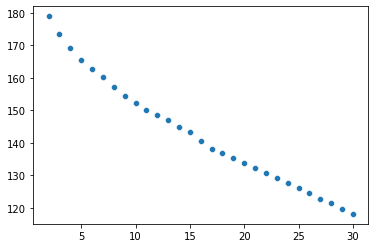

In [10]:
# elbow

clusters_range = list(range(2, 31))
inertia = []

for i in list(range(2, 31)):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(data_trans)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

In [14]:
# 실루엣
from sklearn.metrics import silhouette_score

k_range = range(2, 15)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(data_trans)
    clusters = kmeans.predict(data_trans)
    
    score = silhouette_score(data_trans, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

k : 2 score : 0.031430271495704015
k : 3 score : 0.039786737127148544
k : 4 score : 0.04214158583046321
k : 5 score : 0.048365297176180204
k : 6 score : 0.04689789143080343
k : 7 score : 0.04793817409615251
k : 8 score : 0.05138367340387182
k : 9 score : 0.05330150201571974
k : 10 score : 0.05521525312894205
k : 11 score : 0.05698026578162192
k : 12 score : 0.052886566749735416
k : 13 score : 0.05487941269415366
k : 14 score : 0.0607408027049306
best n : 14 best score : 0.0607408027049306


In [36]:
# 실제 학습
clst = KMeans(n_clusters=10, random_state=0)
clst.fit(data_trans)


clusters_text = clst.labels_.tolist()

centers_text = clst.cluster_centers_ # cluster의 중심

In [39]:
clusters_text

[4,
 4,
 3,
 1,
 0,
 3,
 4,
 4,
 0,
 1,
 6,
 2,
 4,
 8,
 3,
 0,
 5,
 0,
 5,
 8,
 4,
 1,
 3,
 0,
 0,
 7,
 6,
 3,
 3,
 0,
 5,
 9,
 2,
 0,
 7,
 0,
 0,
 5,
 3,
 5,
 0,
 9,
 8,
 6,
 3,
 0,
 0,
 4,
 1,
 2,
 0,
 3,
 9,
 0,
 0,
 0,
 5,
 2,
 2,
 8,
 0,
 2,
 2,
 5,
 2,
 8,
 2,
 7,
 4,
 5,
 1,
 8,
 5,
 0,
 6,
 9,
 1,
 4,
 0,
 2,
 9,
 2,
 8,
 2,
 0,
 0,
 5,
 9,
 8,
 0,
 1,
 9,
 0,
 0,
 0,
 1,
 0,
 2,
 5,
 1,
 0,
 7,
 5,
 8,
 4,
 0,
 9,
 5,
 6,
 3,
 2,
 2,
 5,
 0,
 9,
 2,
 9,
 7,
 5,
 0,
 2,
 9,
 5,
 4,
 4,
 2,
 5,
 4,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 4,
 0,
 5,
 5,
 9,
 2,
 0,
 5,
 2,
 1,
 9,
 4,
 0,
 5,
 5,
 0,
 0,
 2,
 1,
 1,
 0,
 4,
 5,
 5,
 3,
 3,
 0,
 4,
 3,
 5,
 2,
 4,
 1,
 0,
 5,
 1,
 0,
 5,
 0,
 0,
 5,
 1,
 0,
 1,
 0,
 5,
 0,
 0,
 1,
 0,
 5,
 5,
 5,
 5,
 4,
 0,
 2,
 4,
 5,
 4,
 5,
 1]

In [35]:
centers_text.shape

(10, 550)

In [40]:
df["cluster"]= clusters_text

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['화학', '운수장비', '화학', '통신업', '금융업', '전기가스업', '전기,전자', '전기,전자', '화학', '비금속광물', '철강및금속', '화학', '화학', '화학', '전기,전자', '서비스업', '서비스업', '화학', '금융업', '비금속광물', '유통업', '금융업', '전기,전자', '화학', '화학', '서비스업', '전기,전자', '운수장비', '유통업', '화학', '화학', '금융업', '화학', '금융업', '유통업', '전기,전자', '건설업', '유통업', '전기,전자', '화학', '화학', '서비스업', '금융업', '화학', '화학', '제조업', '화학', '서비스업', '기계', '섬유,의복', '철강및금속', '금융업', '금융업', '유통업', '화학']


['의약품', '의약품', '금융업', '서비스업', '의약품', '금융업', '의약품', '의약품', '의약품', '화학', '금융업', '의약품', '서비스업', '의약품', '의약품', '화학', '의약품', '의약품', '의약품', '의약품']


['철강및금속', '기계', '운수장비', '철강및금속', '건설업', '화학', '서비스업', '화학', '전기,전자', '기계', '운수장비', '건설업', '화학', '유통업', '건설업', '건설업', '서비스업', '운수장비', '기계', '건설업', '금융업', '비금속광물', '철강및금속', '기계']


['서비스업', '서비스업', '서비스업', '의약품', '서비스업', '서비스업', '서비스업', '통신업', '통신업', '서비스업', '서비스업', '서비스업', '서비스업']


['전기,전자', '전기,전자', '전기,전자', '운수장비', '운수장비', '전기,전자', '기계', '전기,전자', '화학', '운수장비', '화학', '전기,전자', '운수장비', '화학', '서비스업', '철강및금속', '전기,전자', '유통업', '운수장비', '금융업', '화학']


['유통업

In [20]:
# 데이터 프레임 형태로 클러스터 결과 확인

df["cluster"]= clusters_text

df_groupby_cluster = df.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df.groupby('cluster')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['LG화학', '기아', 'SK이노베이션', 'SK텔레콤', 'LG', '한국전력', 'SK아이이테크놀로지', '삼성전기', 'S-Oil', '포스코케미칼', '고려아연', '한화솔루션', '롯데케미칼', 'SKC', 'LG디스플레이', '강원랜드', '코웨이', '금호석유', 'GS', '쌍용C&E;', '호텔신라', '롯데지주', '두산퓨얼셀', 'OCI', '효성첨단소재', '에스원', '한화시스템', '한국항공우주', '롯데쇼핑', '효성티앤씨', '한화', '효성', '롯데정밀화학', 'LS', '영원무역', '대한전선', '한전KPS', '현대백화점', 'LS ELECTRIC', '동원시스템즈', '금호타이어', '롯데관광개발', 'DL', '대한유화', '태광산업', '화승엔터프라이즈', '휴켐스', 'GKL', 'LIG넥스원', '한세실업', '풍산', 'SK디스커버리', '삼양홀딩스', '현대홈쇼핑', '넥센타이어']


['삼성바이오로직스', '셀트리온', 'SK', 'SK바이오팜', '유한양행', '한미사이언스', '한미약품', '녹십자', '신풍제약', 'SK케미칼', '대웅', '대웅제약', '녹십자홀딩스', '종근당', '한올바이오파마', '한국콜마', '보령제약', '부광약품', '영진약품', '일양약품']


['POSCO', '두산중공업', '한국조선해양', '현대제철', '현대건설', '한국타이어앤테크놀로지', '삼성엔지니어링', '현대중공업지주', '일진머티리얼즈', '두산밥캣', '삼성중공업', 'GS건설', 'KCC', '포스코인터내셔널', '대우건설', 'DL이앤씨', '한전기술', '한화에어로스페이스', '현대엘리베이', 'HDC현대산업개발', '한국앤컴퍼니', '아이에스동서', 'KG동부제철', '현대두산인프라코어']


['NAVER', '카카오', '크래프톤', 'SK바이오사이언스', '엔씨소프트', '하이브', '넷마블', 'KT', 'LG유플러스', '제일기획', '더블유게임즈', '이노션', 'CJ CGV'

In [ ]:
# 주가변동

In [24]:
# elbow 

clusters_range = list(range(2, 25))
inertia = []

for i in list(range(2, 25)):
    tskmeans = TimeSeriesKMeans(n_clusters = i, metric='euclidean')
    tskmeans.fit(df_price)
    inertia.append(tskmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

<AxesSubplot:>

In [43]:
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    stskmeans = TimeSeriesKMeans(n_clusters = k, metric = 'euclidean')
    stskmeans.fit(df_price)
    clusters = stskmeans.labels_
    
    score = silhouette_score(df_price, labels = clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

k : 2 score : 0.3024277788917913
k : 3 score : 0.21868262074212783
k : 4 score : 0.17772748957161807
k : 5 score : 0.13746590226729774
k : 6 score : 0.13827083633549592
k : 7 score : 0.13793081524313594
k : 8 score : 0.14064083138604896
k : 9 score : 0.13413918488839924
best n : 2 best score : 0.3024277788917913


In [42]:
# 실제 클러스터링
n_clusters = 20
tsclst = TimeSeriesKMeans(n_clusters = n_clusters, metric = 'euclidean') #'euclidean', 'dtw'
tsclst.fit(df_price)

clusters_price = tsclst.labels_.tolist()

centers_price = tsclst.cluster_centers_

In [46]:
centers_price

array([[[-1.57554306],
        [-1.56928484],
        [-1.67604506],
        ...,
        [-0.25902772],
        [-0.24852993],
        [-0.29831191]],

       [[-0.55983705],
        [-0.70784969],
        [-1.03817097],
        ...,
        [ 0.02658109],
        [-0.03390896],
        [ 0.04366951]],

       [[-1.49927175],
        [-1.46800101],
        [-1.56870987],
        ...,
        [ 0.68013586],
        [ 0.73744775],
        [ 0.72097215]],

       ...,

       [[-1.97148854],
        [-1.63141911],
        [-1.84742298],
        ...,
        [-1.12739965],
        [-1.18198046],
        [-1.22730535]],

       [[-0.27857469],
        [-0.27758076],
        [-0.29276555],
        ...,
        [-1.85013728],
        [-1.8697479 ],
        [-1.76848868]],

       [[-0.91130724],
        [-1.02997401],
        [-1.21755749],
        ...,
        [-0.85555922],
        [-0.70006982],
        [-0.84683756]]])

In [50]:
centers_price = centers_price.reshape(n_clusters,248)
centers_price

array([[-1.57554306, -1.56928484, -1.67604506, ..., -0.25902772,
        -0.24852993, -0.29831191],
       [-0.55983705, -0.70784969, -1.03817097, ...,  0.02658109,
        -0.03390896,  0.04366951],
       [-1.49927175, -1.46800101, -1.56870987, ...,  0.68013586,
         0.73744775,  0.72097215],
       ...,
       [-1.97148854, -1.63141911, -1.84742298, ..., -1.12739965,
        -1.18198046, -1.22730535],
       [-0.27857469, -0.27758076, -0.29276555, ..., -1.85013728,
        -1.8697479 , -1.76848868],
       [-0.91130724, -1.02997401, -1.21755749, ..., -0.85555922,
        -0.70006982, -0.84683756]])

In [51]:
# 데이터 프레임 형태로 클러스터 결과 확인

df_price["cluster"]= clusters_price
df_price["name"]= df_price.index

df_groupby_cluster = df_price.groupby('cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_price.groupby('cluster')["name"].apply(list)

for i in groupby_list:
    print(i)
    print('\n')
df_price = df_price.drop("name",axis=1, errors = 'ignore')
df_price = df_price.drop("cluster",axis=1, errors = 'ignore')

['POSCO', '한국조선해양', '현대제철', '한국금융지주', '두산밥캣', '현대미포조선', '대우조선해양', '신세계', '신세계인터내셔날', 'KG동부제철', '화승엔터프라이즈', '한섬', '풍산', '현대그린푸드', '쿠쿠홀딩스', 'LX하우시스']


['유한양행', '두산퓨얼셀', '에스원', '대웅']


['카카오', 'KB금융', 'SK텔레콤', '신한지주', '하나금융지주', 'HMM', 'S-Oil', 'KT', 'LG유플러스', '현대건설', '현대중공업지주', 'GS', '쌍용C&E;', 'NH투자증권', '호텔신라', '팬오션', '효성티앤씨', '한전기술', '영원무역', '현대엘리베이', '한전KPS', '동국제강', '코스맥스', '영풍', '태광산업', '오리온홀딩스', '쿠쿠홈시스', '한세실업', '삼양홀딩스', '동원F&B;', '넥센타이어']


['KT&G;', 'SK바이오팜', '신풍제약', 'SK케미칼', 'DL', '한올바이오파마', 'SK디스커버리', '영진약품', '삼양식품', '일양약품']


['LG생활건강', '현대두산인프라코어']


['SK하이닉스', '오리온', '이마트', '롯데쇼핑', '대한유화']


['한국가스공사', '롯데정밀화학', '후성', 'LS ELECTRIC', '아시아나항공', '휴켐스']


['NAVER', '하이브', 'SKC', '강원랜드', '일진머티리얼즈', '한솔케미칼', 'OCI', '효성첨단소재', '포스코인터내셔널', '한샘', '현대로템', '코오롱인더', '한화에어로스페이스', '동원시스템즈', '롯데관광개발', 'LIG넥스원']


['삼성SDI', '기아', 'SK이노베이션', 'LG전자', '포스코케미칼', 'LG이노텍', '한화시스템', '한국항공우주', '한화', 'DB하이텍', '현대위아', 'HDC현대산업개발', '세방전지']


['롯데케미칼', '미래에셋증권', '삼성중공업', '한미약품', '키움증권', 'F&F;홀딩스']


['넷마

In [ ]:
# 재무지표

In [52]:
# elbow 

clusters_range = list(range(2, 15))
inertia = []

for i in list(range(2, 15)):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(finance_data)
    inertia.append(kmeans.inertia_)

sns.scatterplot(x=clusters_range, y=inertia)

<AxesSubplot:>

In [54]:
from sklearn.metrics import silhouette_score

k_range = range(2, 15)
best_n = -1
best_silhouette_score = -1

for k in k_range:
    kmeans = KMeans(n_clusters = k, random_state = 100)
    kmeans.fit(finance_data)
    clusters = kmeans.predict(finance_data)
    
    score = silhouette_score(finance_data, clusters)
    print('k :', k, 'score :', score)
    
    if score > best_silhouette_score:
        best_n = k
        best_silhouette_score = score
        
print('best n :', best_n, 'best score :', best_silhouette_score)

k : 2 score : 0.27542646373868857
k : 3 score : 0.4013148600204463
k : 4 score : 0.4087884160009373
k : 5 score : 0.29832870211164225
k : 6 score : 0.29013921591926434
k : 7 score : 0.3007209174359436
k : 8 score : 0.306413895005616
k : 9 score : 0.30312279371673984
k : 10 score : 0.24849055817233795
k : 11 score : 0.24200923733582203
k : 12 score : 0.23078048427416897
k : 13 score : 0.2378317588425159
k : 14 score : 0.2393990955184438
best n : 4 best score : 0.4087884160009373


In [56]:
# 실제 클러스터링
finance_data = df_finance[["PER", "PBR", "PCR", "EV/EBITDA", "Dividend"]]
clst = KMeans(n_clusters=5)
clst.fit(finance_data)

clusters_finance = clst.labels_.tolist()

centers_finance = clst.cluster_centers_

In [59]:
centers_finance

array([[ 2.68571429e+00,  1.07055877e+00,  3.47645363e+00,
         3.36649854e+00,  2.38571429e+00],
       [ 2.76000000e+00,  2.77715178e+00,  6.97147541e+00,
         5.86937089e+00,  1.52000000e+00],
       [ 1.72222222e+00, -2.46122430e-01, -2.94103106e+00,
         4.28964276e+00,  1.16666667e+00],
       [ 0.00000000e+00,  1.48767707e+00, -2.02765791e+00,
        -4.82456258e+00,  2.22044605e-16],
       [ 1.71052632e+00, -5.91512826e-01,  1.85002676e+00,
         2.71731576e+00,  1.71052632e+00]])

In [ ]:
############## 3번 대안 실행

In [99]:
df_text_result = df.copy()[['name']]
df_text_result['text_clusters'] = clusters_text

df_text_result

name  text_clusters
0        삼성전자              4
1      SK하이닉스              4
2       NAVER              3
3    삼성바이오로직스              1
4        LG화학              0
..        ...            ...
195     LX홀딩스              4
196    롯데하이마트              5
197    LX하우시스              4
198      삼양식품              5
199      일양약품              1

[200 rows x 2 columns]

In [100]:
centers_text.shape

(10, 550)

In [64]:
df_price_result = pd.DataFrame()
df_price_result['name'] = df_price.index
df_price_result['price_clusters'] = clusters_price
df_price_result

name  price_clusters
0         삼성전자              14
1       SK하이닉스               5
2        NAVER               7
3     삼성바이오로직스              12
4         LG화학              14
..         ...             ...
189  현대두산인프라코어               4
190     롯데하이마트              19
191     LX하우시스               0
192       삼양식품               3
193       일양약품               3

[194 rows x 2 columns]

In [72]:
centers_price.shape

(20, 248)

In [113]:
df_finance_result = pd.DataFrame()
df_finance_result['name'] = df_finance['name']
df_finance_result['finance_clusters'] = clusters_finance
df_finance_result

name  finance_clusters
0         삼성전자                 0
1       SK하이닉스                 0
2        NAVER                 1
3     삼성바이오로직스                 1
4         LG화학                 0
..         ...               ...
193  현대두산인프라코어                 4
194     롯데하이마트                 4
195     LX하우시스                 4
196       삼양식품                 0
197       일양약품                 0

[198 rows x 2 columns]

In [71]:
centers_finance.shape

(5, 5)

In [74]:
from scipy.spatial import distance_matrix

In [288]:
## 대칭행렬 min_max 정규화하는 함수
def normalize(distance_matrix):
    # 행렬 반쪽만 num_list에 추가
    num_list = []
    for i in range(len(distance_matrix)):
        for j in range(i+1, len(distance_matrix)):
            num_list.append(distance_matrix[i][j])
            
    num_array = np.array(num_list)
    max_num = num_array.max() # 평균
    min_num = num_array.min() # 표준편차
    
    
    for i in range(len(distance_matrix)):
        for j in range(len(distance_matrix)):
            if distance_matrix[i][j] != 0:
                distance_matrix[i][j] = (distance_matrix[i][j]-min_num)/(max_num - min_num)
    
    return distance_matrix

In [289]:
distance_matrix_text = pd.DataFrame(distance_matrix(centers_text, centers_text))
distance_matrix_text

0         1         2         3         4         5         6  \
0  0.000000  0.583574  0.399975  0.530868  0.454628  0.401960  0.740854   
1  0.583574  0.000000  0.684515  0.714467  0.715999  0.637255  0.898400   
2  0.399975  0.684515  0.000000  0.631098  0.544024  0.535251  0.818362   
3  0.530868  0.714467  0.631098  0.000000  0.664159  0.562433  0.797474   
4  0.454628  0.715999  0.544024  0.664159  0.000000  0.578238  0.859757   
5  0.401960  0.637255  0.535251  0.562433  0.578238  0.000000  0.788921   
6  0.740854  0.898400  0.818362  0.797474  0.859757  0.788921  0.000000   
7  0.865577  1.006051  0.927409  0.961506  0.953781  0.910892  0.867863   
8  0.714918  0.861763  0.787418  0.786695  0.827407  0.761527  0.619209   
9  0.500710  0.721635  0.526319  0.661546  0.603694  0.561449  0.851958   

          7         8         9  
0  0.865577  0.714918  0.500710  
1  1.006051  0.861763  0.721635  
2  0.927409  0.787418  0.526319  
3  0.961506  0.786695  0.661546  
4  0.953781  0.827407  0.603694  
5  0.910892  0.761527  0.561449  
6  0.867863  0.619209  0.851958  
7  0.000000  0.971479  0.952661  
8  0.971479  0.000000  0.823131  
9  0.952661  0.823131  0.000000

In [290]:
distance_matrix_price = pd.DataFrame(distance_matrix(centers_price, centers_price))
distance_matrix_price

0          1          2          3          4          5   \
0    0.000000  21.192646   6.110215  26.085025  18.088460  15.765046   
1   21.192646   0.000000  21.435839  15.958805  18.659404  15.660124   
2    6.110215  21.435839   0.000000  26.889902  20.624990  18.528194   
3   26.085025  15.958805  26.889902   0.000000  17.369015  21.340556   
4   18.088460  18.659404  20.624990  17.369015   0.000000  17.602363   
5   15.765046  15.660124  18.528194  21.340556  17.602363   0.000000   
6   18.079463  17.092247  14.374123  24.053268  25.803705  19.859791   
7   11.187406  19.974011   7.466208  27.317790  23.277262  16.931341   
8   10.960136  16.832565  11.071587  26.388062  20.052091  12.474058   
9   18.161482  14.042195  21.450906  15.595983  13.757790  10.022078   
10  11.982912  17.238233  13.723145  20.386044  12.004387  17.191712   
11  24.856195  22.322903  23.882385  15.430143  20.311998  25.839331   
12  13.371521  19.865153   9.331192  23.966095  20.329764  21.844310   
13  12.092585  21.178366   7.244866  25.779893  23.576654  20.856311   
14  14.528611  13.552926  16.758843  22.187089  15.991565   9.094392   
15   6.360174  18.409715   6.858324  26.233391  19.058600  14.050340   
16  13.948282  11.510251  14.810185  21.356890  17.506816  15.479890   
17  22.612145  11.715238  24.541320  14.337882  16.973208  14.911862   
18  21.956686  12.223963  24.408068  12.571846  14.431752  12.375368   
19   8.834990  17.940015  13.172589  22.430095  13.229791  10.717443   

           6          7          8          9          10         11  \
0   18.079463  11.187406  10.960136  18.161482  11.982912  24.856195   
1   17.092247  19.974011  16.832565  14.042195  17.238233  22.322903   
2   14.374123   7.466208  11.071587  21.450906  13.723145  23.882385   
3   24.053268  27.317790  26.388062  15.595983  20.386044  15.430143   
4   25.803705  23.277262  20.052091  13.757790  12.004387  20.311998   
5   19.859791  16.931341  12.474058  10.022078  17.191712  25.839331   
6    0.000000   9.931597  14.853189  22.784224  21.101260  23.242305   
7    9.931597   0.000000   8.703027  21.839110  17.569647  25.233824   
8   14.853189   8.703027   0.000000  17.473355  14.734623  26.612155   
9   22.784224  21.839110  17.473355   0.000000  15.385841  23.728503   
10  21.101260  17.569647  14.734623  15.385841   0.000000  19.590719   
11  23.242305  25.233824  26.612155  23.728503  19.590719   0.000000   
12  13.759525  11.654871  15.071913  23.098441  13.131609  19.048825   
13  10.093013   7.995762  14.550540  23.414123  17.506650  22.872101   
14  19.301533  15.998877   8.716835  11.266461  13.051496  25.471649   
15  15.329409   8.412320   6.083045  17.867025  12.241032  25.312231   
16  17.382574  15.828638  11.666003  14.966363  10.744552  24.059740   
17  22.551759  23.971335  19.799979   9.578159  18.494337  22.600252   
18  23.926415  24.108432  19.963581   7.884918  17.020372  21.517352   
19  20.754273  15.420673  11.126799  11.991860  10.626487  23.895226   

           12         13         14         15         16         17  \
0   13.371521  12.092585  14.528611   6.360174  13.948282  22.612145   
1   19.865153  21.178366  13.552926  18.409715  11.510251  11.715238   
2    9.331192   7.244866  16.758843   6.858324  14.810185  24.541320   
3   23.966095  25.779893  22.187089  26.233391  21.356890  14.337882   
4   20.329764  23.576654  15.991565  19.058600  17.506816  16.973208   
5   21.844310  20.856311   9.094392  14.050340  15.479890  14.911862   
6   13.759525  10.093013  19.301533  15.329409  17.382574  22.551759   
7   11.654871   7.995762  15.998877   8.412320  15.828638  23.971335   
8   15.071913  14.550540   8.716835   6.083045  11.666003  19.799979   
9   23.098441  23.414123  11.266461  17.867025  14.966363   9.578159   
10  13.131609  17.506650  13.051496  12.241032  10.744552  18.494337   
11  19.048825  22.872101  25.471649  25.312231  24.059740  22.600252   
12   0.000000   8.478004  18.999439  12.832345  1

In [291]:
distance_matrix_finance = pd.DataFrame(distance_matrix(centers_finance, centers_finance))
distance_matrix_finance

0          1          2          3         4
0   0.000000   4.706058   6.795907  10.510348  2.689992
1   4.706058   0.000000  10.540177  14.385248  6.974976
2   6.795907  10.540177   0.000000   9.551765  5.083469
3  10.510348  14.385248   9.551765   0.000000  9.060419
4   2.689992   6.974976   5.083469   9.060419  0.000000

In [292]:
distance_matrix_text = normalize(distance_matrix_text)
distance_matrix_price = normalize(distance_matrix_price)
distance_matrix_finance = normalize(distance_matrix_finance)

In [294]:
# distance_matrix_text

0         1         2         3         4         5         6  \
0  0.000000  0.302931  0.000000  0.215967  0.090175  0.003274  0.562437   
1  0.302931  0.000000  0.469480  0.518898  0.521427  0.391501  0.822381   
2  0.000000  0.469480  0.000000  0.381343  0.237675  0.223200  0.690321   
3  0.215967  0.518898  0.381343  0.000000  0.435893  0.268048  0.655857   
4  0.090175  0.521427  0.237675  0.435893  0.000000  0.294127  0.758622   
5  0.003274  0.391501  0.223200  0.268048  0.294127  0.000000  0.641745   
6  0.562437  0.822381  0.690321  0.655857  0.758622  0.641745  0.000000   
7  0.768225  1.000000  0.870244  0.926503  0.913757  0.842992  0.771995   
8  0.519643  0.761932  0.639264  0.638072  0.705246  0.596546  0.361728   
9  0.166208  0.530725  0.208462  0.431582  0.336128  0.266425  0.745753   

          7         8         9  
0  0.768225  0.519643  0.166208  
1  1.000000  0.761932  0.530725  
2  0.870244  0.639264  0.208462  
3  0.926503  0.638072  0.431582  
4  0.913757  0.705246  0.336128  
5  0.842992  0.596546  0.266425  
6  0.771995  0.361728  0.745753  
7  0.000000  0.942959  0.911909  
8  0.942959  0.000000  0.698190  
9  0.911909  0.698190  0.000000

In [295]:
# distance_matrix_price

0         1         2         3         4         5         6   \
0   0.000000  0.711551  0.001279  0.941946  0.565367  0.455951  0.564943   
1   0.711551  0.000000  0.723003  0.465076  0.592254  0.451010  0.518452   
2   0.001279  0.723003  0.000000  0.979850  0.684818  0.586075  0.390449   
3   0.941946  0.465076  0.979850  0.000000  0.531486  0.718516  0.846265   
4   0.565367  0.592254  0.684818  0.531486  0.000000  0.542475  0.928698   
5   0.455951  0.451010  0.586075  0.718516  0.542475  0.000000  0.648783   
6   0.564943  0.518452  0.390449  0.846265  0.928698  0.648783  0.000000   
7   0.240378  0.654162  0.065137  1.000000  0.809721  0.510875  0.181238   
8   0.229675  0.506223  0.234924  0.956217  0.657839  0.300970  0.413009   
9   0.568805  0.374817  0.723713  0.447989  0.361424  0.185499  0.786502   
10  0.277840  0.525327  0.359792  0.673566  0.278852  0.523136  0.707247   
11  0.884077  0.764778  0.838218  0.440179  0.670079  0.930375  0.808075   
12  0.343233  0.649036  0.152964  0.842160  0.670915  0.742239  0.361506   
13  0.283005  0.710878  0.054713  0.927576  0.823820  0.695712  0.188840   
14  0.397724  0.351776  0.502751  0.758382  0.466618  0.141812  0.622493   
15  0.013051  0.580495  0.036510  0.948933  0.611053  0.375201  0.435436   
16  0.370395  0.255581  0.410984  0.719286  0.537975  0.442522  0.532125   
17  0.778399  0.265235  0.869249  0.388742  0.512846  0.415772  0.775555   
18  0.747532  0.289192  0.862974  0.305575  0.393163  0.296322  0.840291   
19  0.129596  0.558376  0.333865  0.769826  0.336559  0.218246  0.690907   

          7         8         9         10        11        12        13  \
0   0.240378  0.229675  0.568805  0.277840  0.884077  0.343233  0.283005   
1   0.654162  0.506223  0.374817  0.525327  0.764778  0.649036  0.710878   
2   0.065137  0.234924  0.723713  0.359792  0.838218  0.152964  0.054713   
3   1.000000  0.956217  0.447989  0.673566  0.440179  0.842160  0.927576   
4   0.809721  0.657839  0.361424  0.278852  0.670079  0.670915  0.823820   
5   0.510875  0.300970  0.185499  0.523136  0.930375  0.742239  0.695712   
6   0.181238  0.413009  0.786502  0.707247  0.808075  0.361506  0.188840   
7   0.000000  0.123382  0.741995  0.540934  0.901861  0.262392  0.090075   
8   0.123382  0.000000  0.536400  0.407426  0.966770  0.423309  0.398757   
9   0.741995  0.536400  0.000000  0.438093  0.830971  0.801300  0.816166   
10  0.540934  0.407426  0.438093  0.000000  0.636112  0.331935  0.537968   
11  0.901861  0.966770  0.830971  0.636112  0.000000  0.610593  0.790641   
12  0.262392  0.423309  0.801300  0.331935  0.610593  0.000000  0.112785   
13  0.090075  0.398757  0.816166  0.537968  0.790641  0.112785  0.000000   
14  0.466963  0.124032  0.244101  0.328163  0.913060  0.608267  0.656259   
15  0.109692  0.000000  0.554939  0.289996  0.905553  0.317842  0.280490   
16  0.458946  0.262916  0.418339  0.219523  0.846570  0.399788  0.505316   
17  0.842407  0.645967  0.164594  0.584480  0.777839  0.870925  0.915857   
18  0.848863  0.653671  0.084855  0.515067  0.726842  0.847596  0.922333   
19  0.439733  0.237524  0.278262  0.213963  0.838822  0.552553  0.564880   

          14        15        16        17        18        19  
0   0.397724  0.013051  0.370395  0.778399  0.747532  0.129596  
1   0.351776  0.580495  0.255581  0.265235  0.289192  0.558376  
2   0.502751  0.036510  0.410984  0.869249  0.862974  0.333865  
3   0.758382  0.948933  0.719286  0.388742  0.305575  0.769826  
4   0.466618  0.611053  0.537975  0.512846  0.393163  0.336559  
5   0.141812  0.375201  0.442522  0.415772  0.296322  0.218246  
6   0.622493  0.435436  0.532125  0.775555  0.840291  0.690907  
7   0.466963  0.109692  0.458946  0.842407  0.848863  0.439733  
8   0.124032  0.000000  0.262916  0.645967  0.653671  0.237524  
9   0.244101  0.554939  0.418339  0.164594  0.084855  0.278262  
10  0.328163  0.289996  0.219523  0.584480  0.515067  0.213963  
11  0.913060  0.905553  0.846570  0.

In [296]:
# distance_matrix_finance

0         1         2         3         4
0  0.000000  0.172383  0.351075  0.668678  0.000000
1  0.172383  0.000000  0.671228  1.000000  0.366386
2  0.351075  0.671228  0.000000  0.586714  0.204654
3  0.668678  1.000000  0.586714  0.000000  0.544702
4  0.000000  0.366386  0.204654  0.544702  0.000000

In [297]:
# df_text_result --> 기업개요 클러스터링 결과 200 x 200
# df_price_result --> 주가변동 클러스터링 결과 194 x 194
# df_finance_result --> 재무지표 클러스터링 결과 198 x 198

df_merge_result = pd.merge(df_text_result, df_price_result, left_on='name', right_on='name', how='left')
df_merge_result = pd.merge(df_merge_result, df_finance_result, left_on='name', right_on='name', how='left')
df_merge_result = df_merge_result.fillna(100)
df_merge_result = df_merge_result.astype({'price_clusters':int, 'finance_clusters':int})
df_merge_result

name  text_clusters  price_clusters  finance_clusters
0        삼성전자              4              14                 0
1      SK하이닉스              4               5                 0
2       NAVER              3               7                 1
3    삼성바이오로직스              1              12                 1
4        LG화학              0              14                 0
..        ...            ...             ...               ...
195     LX홀딩스              4             100               100
196    롯데하이마트              5              19                 4
197    LX하우시스              4               0                 4
198      삼양식품              5               3                 0
199      일양약품              1               3                 0

[200 rows x 4 columns]

In [298]:
df_dist_new = pd.DataFrame(index = df_merge_result.index, columns = df_merge_result.index)
df_dist_new

0    1    2    3    4    5    6    7    8    9    ...  190  191  192  \
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
197  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
198  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   
199  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN   

     193  194  195  196  197  198  199  
0    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
1    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
3    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
4    NaN  NaN  NaN  NaN  NaN  NaN  NaN  
..   ...  ...  ...  ...  ...  ...  ...  
195  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
196  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
197  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
198  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
199  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[200 rows x 200 columns]

In [299]:
# df_clusters_result --> 클러스터링 결과 left join으로 합친 것 200 x 200, null 값은 100으로 채움
# normal_dist_text --> text 클러스터링 distance matrix
# normal_dist_price --> 주가 클러스터링 distance matrix

# 거리의 합으로 새로운 200x200 distance matrix 만들어보자

## 가중치
weight_text = 10
weight_price = 1
weight_finance = 1

for i in range(len(df_merge_result)):
    for j in range(len(df_merge_result)):
        distance = 0
        try: 
            text_cluster_1 = df_merge_result['text_clusters'][i] # 첫 번째 기업의 개요 클러스터
            text_cluster_2 = df_merge_result['text_clusters'][j] # 두 번째 기업의 개요 클러스터
            distance += weight_text * distance_matrix_text[text_cluster_1][text_cluster_2] # 개요 클러스터 거리 * weight
        except KeyError:
            print('{}, {}의 text 거리가 계산되지 않습니다.'.format(df_merge_result['name'][i], df_merge_result['name'][j]))
            
        try:
            price_cluster_1 = df_merge_result['price_clusters'][i] # 첫 번째 기업의 주가 클러스터
            price_cluster_2 = df_merge_result['price_clusters'][j] # 두 번째 기업의 주가 클러스터
            distance += weight_price * distance_matrix_price[price_cluster_1][price_cluster_2] # 주가 클러스터 거리 * weight
        except KeyError:
            print('{}, {}의 price 거리가 계산되지 않습니다.'.format(df_merge_result['name'][i], df_merge_result['name'][j]))
            
        try:
            finance_cluster_1 = df_merge_result['finance_clusters'][i] # 첫 번째 기업의 재무 클러스터
            finance_cluster_2 = df_merge_result['finance_clusters'][j] # 두 번째 기업의 재무 클러스터
            distance += weight_finance * distance_matrix_finance[finance_cluster_1][finance_cluster_2] # 재무 클러스터 거리 * weight
        except KeyError:
            print('{}, {}의 finance 거리가 계산되지 않습니다.'.format(df_merge_result['name'][i], df_merge_result['name'][j]))
        
        df_dist_new[i][j] = distance
        

삼성전자, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성전자, 크래프톤의 price 거리가 계산되지 않습니다.
삼성전자, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성전자, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성전자, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성전자, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성전자, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성전자, LX홀딩스의 finance 거리가 계산되지 않습니다.
SK하이닉스, 카카오뱅크의 price 거리가 계산되지 않습니다.
SK하이닉스, 크래프톤의 price 거리가 계산되지 않습니다.
SK하이닉스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
SK하이닉스, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
SK하이닉스, DL이앤씨의 price 거리가 계산되지 않습니다.
SK하이닉스, DL이앤씨의 finance 거리가 계산되지 않습니다.
SK하이닉스, LX홀딩스의 price 거리가 계산되지 않습니다.
SK하이닉스, LX홀딩스의 finance 거리가 계산되지 않습니다.
NAVER, 카카오뱅크의 price 거리가 계산되지 않습니다.
NAVER, 크래프톤의 price 거리가 계산되지 않습니다.
NAVER, SK바이오사이언스의 price 거리가 계산되지 않습니다.
NAVER, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
NAVER, DL이앤씨의 price 거리가 계산되지 않습니다.
NAVER, DL이앤씨의 finance 거리가 계산되지 않습니다.
NAVER, LX홀딩스의 price 거리가 계산되지 않습니다.
NAVER, LX홀딩스의 finance 거리가 계산되지 않습니다.
삼성바이오로직스, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성바이오로직스, 크래프톤의 price 거리가 계산되지 않습니다.
삼성바이오로직스, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성바이오로직

현대모비스, DL이앤씨의 price 거리가 계산되지 않습니다.
현대모비스, DL이앤씨의 finance 거리가 계산되지 않습니다.
현대모비스, LX홀딩스의 price 거리가 계산되지 않습니다.
현대모비스, LX홀딩스의 finance 거리가 계산되지 않습니다.
KB금융, 카카오뱅크의 price 거리가 계산되지 않습니다.
KB금융, 크래프톤의 price 거리가 계산되지 않습니다.
KB금융, SK바이오사이언스의 price 거리가 계산되지 않습니다.
KB금융, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
KB금융, DL이앤씨의 price 거리가 계산되지 않습니다.
KB금융, DL이앤씨의 finance 거리가 계산되지 않습니다.
KB금융, LX홀딩스의 price 거리가 계산되지 않습니다.
KB금융, LX홀딩스의 finance 거리가 계산되지 않습니다.
크래프톤, 삼성전자의 price 거리가 계산되지 않습니다.
크래프톤, SK하이닉스의 price 거리가 계산되지 않습니다.
크래프톤, NAVER의 price 거리가 계산되지 않습니다.
크래프톤, 삼성바이오로직스의 price 거리가 계산되지 않습니다.
크래프톤, LG화학의 price 거리가 계산되지 않습니다.
크래프톤, 카카오의 price 거리가 계산되지 않습니다.
크래프톤, 삼성SDI의 price 거리가 계산되지 않습니다.
크래프톤, 현대차의 price 거리가 계산되지 않습니다.
크래프톤, 기아의 price 거리가 계산되지 않습니다.
크래프톤, 셀트리온의 price 거리가 계산되지 않습니다.
크래프톤, 카카오뱅크의 price 거리가 계산되지 않습니다.
크래프톤, POSCO의 price 거리가 계산되지 않습니다.
크래프톤, 현대모비스의 price 거리가 계산되지 않습니다.
크래프톤, KB금융의 price 거리가 계산되지 않습니다.
크래프톤, 크래프톤의 price 거리가 계산되지 않습니다.
크래프톤, SK이노베이션의 price 거리가 계산되지 않습니다.
크래프톤, 삼성물산의 price 거리가 계산되지 않습니다.
크

LG전자, LX홀딩스의 price 거리가 계산되지 않습니다.
LG전자, LX홀딩스의 finance 거리가 계산되지 않습니다.
SK, 카카오뱅크의 price 거리가 계산되지 않습니다.
SK, 크래프톤의 price 거리가 계산되지 않습니다.
SK, SK바이오사이언스의 price 거리가 계산되지 않습니다.
SK, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
SK, DL이앤씨의 price 거리가 계산되지 않습니다.
SK, DL이앤씨의 finance 거리가 계산되지 않습니다.
SK, LX홀딩스의 price 거리가 계산되지 않습니다.
SK, LX홀딩스의 finance 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성전자의 price 거리가 계산되지 않습니다.
SK바이오사이언스, SK하이닉스의 price 거리가 계산되지 않습니다.
SK바이오사이언스, NAVER의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성바이오로직스의 price 거리가 계산되지 않습니다.
SK바이오사이언스, LG화학의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 카카오의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성SDI의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 현대차의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 기아의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 셀트리온의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 카카오뱅크의 price 거리가 계산되지 않습니다.
SK바이오사이언스, POSCO의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 현대모비스의 price 거리가 계산되지 않습니다.
SK바이오사이언스, KB금융의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 크래프톤의 price 거리가 계산되지 않습니다.
SK바이오사이언스, SK이노베이션의 price 거리가 계산되지 않습니다.
SK바이오사이언스, 삼성물산의 price 거리가 계산되지 않습니다.
SK바이오사

LG, LX홀딩스의 price 거리가 계산되지 않습니다.
LG, LX홀딩스의 finance 거리가 계산되지 않습니다.
한국전력, 카카오뱅크의 price 거리가 계산되지 않습니다.
한국전력, 크래프톤의 price 거리가 계산되지 않습니다.
한국전력, SK바이오사이언스의 price 거리가 계산되지 않습니다.
한국전력, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
한국전력, DL이앤씨의 price 거리가 계산되지 않습니다.
한국전력, DL이앤씨의 finance 거리가 계산되지 않습니다.
한국전력, LX홀딩스의 price 거리가 계산되지 않습니다.
한국전력, LX홀딩스의 finance 거리가 계산되지 않습니다.
삼성생명, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성생명, 크래프톤의 price 거리가 계산되지 않습니다.
삼성생명, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성생명, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성생명, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성생명, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성생명, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성생명, LX홀딩스의 finance 거리가 계산되지 않습니다.
하나금융지주, 카카오뱅크의 price 거리가 계산되지 않습니다.
하나금융지주, 크래프톤의 price 거리가 계산되지 않습니다.
하나금융지주, SK바이오사이언스의 price 거리가 계산되지 않습니다.
하나금융지주, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
하나금융지주, DL이앤씨의 price 거리가 계산되지 않습니다.
하나금융지주, DL이앤씨의 finance 거리가 계산되지 않습니다.
하나금융지주, LX홀딩스의 price 거리가 계산되지 않습니다.
하나금융지주, LX홀딩스의 finance 거리가 계산되지 않습니다.
엔씨소프트, 카카오뱅크의 price 거리가 계산되지 않습니다.
엔씨소프트, 크래프톤의 price 거리가 계산되지 않습니

삼성에스디에스, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성에스디에스, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성에스디에스, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성에스디에스, LX홀딩스의 finance 거리가 계산되지 않습니다.
HMM, 카카오뱅크의 price 거리가 계산되지 않습니다.
HMM, 크래프톤의 price 거리가 계산되지 않습니다.
HMM, SK바이오사이언스의 price 거리가 계산되지 않습니다.
HMM, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
HMM, DL이앤씨의 price 거리가 계산되지 않습니다.
HMM, DL이앤씨의 finance 거리가 계산되지 않습니다.
HMM, LX홀딩스의 price 거리가 계산되지 않습니다.
HMM, LX홀딩스의 finance 거리가 계산되지 않습니다.
두산중공업, 카카오뱅크의 price 거리가 계산되지 않습니다.
두산중공업, 크래프톤의 price 거리가 계산되지 않습니다.
두산중공업, SK바이오사이언스의 price 거리가 계산되지 않습니다.
두산중공업, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
두산중공업, DL이앤씨의 price 거리가 계산되지 않습니다.
두산중공업, DL이앤씨의 finance 거리가 계산되지 않습니다.
두산중공업, LX홀딩스의 price 거리가 계산되지 않습니다.
두산중공업, LX홀딩스의 finance 거리가 계산되지 않습니다.
삼성전기, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성전기, 크래프톤의 price 거리가 계산되지 않습니다.
삼성전기, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성전기, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성전기, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성전기, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성전기, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성전기, LX홀딩스의 finance 거리가 계산되지 않습

금호석유, LX홀딩스의 price 거리가 계산되지 않습니다.
금호석유, LX홀딩스의 finance 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, 카카오뱅크의 price 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, 크래프톤의 price 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, SK바이오사이언스의 price 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, DL이앤씨의 price 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, DL이앤씨의 finance 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, LX홀딩스의 price 거리가 계산되지 않습니다.
한국타이어앤테크놀로지, LX홀딩스의 finance 거리가 계산되지 않습니다.
삼성엔지니어링, 카카오뱅크의 price 거리가 계산되지 않습니다.
삼성엔지니어링, 크래프톤의 price 거리가 계산되지 않습니다.
삼성엔지니어링, SK바이오사이언스의 price 거리가 계산되지 않습니다.
삼성엔지니어링, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
삼성엔지니어링, DL이앤씨의 price 거리가 계산되지 않습니다.
삼성엔지니어링, DL이앤씨의 finance 거리가 계산되지 않습니다.
삼성엔지니어링, LX홀딩스의 price 거리가 계산되지 않습니다.
삼성엔지니어링, LX홀딩스의 finance 거리가 계산되지 않습니다.
오리온, 카카오뱅크의 price 거리가 계산되지 않습니다.
오리온, 크래프톤의 price 거리가 계산되지 않습니다.
오리온, SK바이오사이언스의 price 거리가 계산되지 않습니다.
오리온, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
오리온, DL이앤씨의 price 거리가 계산되지 않습니다.
오리온, DL이앤씨의 finance 거리가 계산되지 않습니다.
오리온, LX홀딩스의 price 거리가 계산되지 않습니다.
오리온, LX홀딩스의 finance 거리가 계산되지 않습니다.
현대중공업지

한미약품, LX홀딩스의 price 거리가 계산되지 않습니다.
한미약품, LX홀딩스의 finance 거리가 계산되지 않습니다.
팬오션, 카카오뱅크의 price 거리가 계산되지 않습니다.
팬오션, 크래프톤의 price 거리가 계산되지 않습니다.
팬오션, SK바이오사이언스의 price 거리가 계산되지 않습니다.
팬오션, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
팬오션, DL이앤씨의 price 거리가 계산되지 않습니다.
팬오션, DL이앤씨의 finance 거리가 계산되지 않습니다.
팬오션, LX홀딩스의 price 거리가 계산되지 않습니다.
팬오션, LX홀딩스의 finance 거리가 계산되지 않습니다.
OCI, 카카오뱅크의 price 거리가 계산되지 않습니다.
OCI, 크래프톤의 price 거리가 계산되지 않습니다.
OCI, SK바이오사이언스의 price 거리가 계산되지 않습니다.
OCI, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
OCI, DL이앤씨의 price 거리가 계산되지 않습니다.
OCI, DL이앤씨의 finance 거리가 계산되지 않습니다.
OCI, LX홀딩스의 price 거리가 계산되지 않습니다.
OCI, LX홀딩스의 finance 거리가 계산되지 않습니다.
효성첨단소재, 카카오뱅크의 price 거리가 계산되지 않습니다.
효성첨단소재, 크래프톤의 price 거리가 계산되지 않습니다.
효성첨단소재, SK바이오사이언스의 price 거리가 계산되지 않습니다.
효성첨단소재, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
효성첨단소재, DL이앤씨의 price 거리가 계산되지 않습니다.
효성첨단소재, DL이앤씨의 finance 거리가 계산되지 않습니다.
효성첨단소재, LX홀딩스의 price 거리가 계산되지 않습니다.
효성첨단소재, LX홀딩스의 finance 거리가 계산되지 않습니다.
에스원, 카카오뱅크의 price 거리가 계산되지 않습니다.
에스원, 크래프톤의 price 거리가 계산되지 않습니다.
에스원, SK바이오사이언

DL이앤씨, 한올바이오파마의 price 거리가 계산되지 않습니다.
DL이앤씨, 한올바이오파마의 finance 거리가 계산되지 않습니다.
DL이앤씨, 화승엔터프라이즈의 price 거리가 계산되지 않습니다.
DL이앤씨, 화승엔터프라이즈의 finance 거리가 계산되지 않습니다.
DL이앤씨, 한섬의 price 거리가 계산되지 않습니다.
DL이앤씨, 한섬의 finance 거리가 계산되지 않습니다.
DL이앤씨, 한국콜마의 price 거리가 계산되지 않습니다.
DL이앤씨, 한국콜마의 finance 거리가 계산되지 않습니다.
DL이앤씨, 휴켐스의 price 거리가 계산되지 않습니다.
DL이앤씨, 휴켐스의 finance 거리가 계산되지 않습니다.
DL이앤씨, 오리온홀딩스의 price 거리가 계산되지 않습니다.
DL이앤씨, 오리온홀딩스의 finance 거리가 계산되지 않습니다.
DL이앤씨, GKL의 price 거리가 계산되지 않습니다.
DL이앤씨, GKL의 finance 거리가 계산되지 않습니다.
DL이앤씨, LIG넥스원의 price 거리가 계산되지 않습니다.
DL이앤씨, LIG넥스원의 finance 거리가 계산되지 않습니다.
DL이앤씨, 쿠쿠홈시스의 price 거리가 계산되지 않습니다.
DL이앤씨, 쿠쿠홈시스의 finance 거리가 계산되지 않습니다.
DL이앤씨, 보령제약의 price 거리가 계산되지 않습니다.
DL이앤씨, 보령제약의 finance 거리가 계산되지 않습니다.
DL이앤씨, 한세실업의 price 거리가 계산되지 않습니다.
DL이앤씨, 한세실업의 finance 거리가 계산되지 않습니다.
DL이앤씨, 부광약품의 price 거리가 계산되지 않습니다.
DL이앤씨, 부광약품의 finance 거리가 계산되지 않습니다.
DL이앤씨, 풍산의 price 거리가 계산되지 않습니다.
DL이앤씨, 풍산의 finance 거리가 계산되지 않습니다.
DL이앤씨, 현대그린푸드의 price 거리가 계산되지 않습니다.
DL이앤씨, 현대그린푸드의 finance 거리가 계산되지 않습니다.
DL이앤

후성, DL이앤씨의 price 거리가 계산되지 않습니다.
후성, DL이앤씨의 finance 거리가 계산되지 않습니다.
후성, LX홀딩스의 price 거리가 계산되지 않습니다.
후성, LX홀딩스의 finance 거리가 계산되지 않습니다.
LS ELECTRIC, 카카오뱅크의 price 거리가 계산되지 않습니다.
LS ELECTRIC, 크래프톤의 price 거리가 계산되지 않습니다.
LS ELECTRIC, SK바이오사이언스의 price 거리가 계산되지 않습니다.
LS ELECTRIC, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
LS ELECTRIC, DL이앤씨의 price 거리가 계산되지 않습니다.
LS ELECTRIC, DL이앤씨의 finance 거리가 계산되지 않습니다.
LS ELECTRIC, LX홀딩스의 price 거리가 계산되지 않습니다.
LS ELECTRIC, LX홀딩스의 finance 거리가 계산되지 않습니다.
오뚜기, 카카오뱅크의 price 거리가 계산되지 않습니다.
오뚜기, 크래프톤의 price 거리가 계산되지 않습니다.
오뚜기, SK바이오사이언스의 price 거리가 계산되지 않습니다.
오뚜기, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
오뚜기, DL이앤씨의 price 거리가 계산되지 않습니다.
오뚜기, DL이앤씨의 finance 거리가 계산되지 않습니다.
오뚜기, LX홀딩스의 price 거리가 계산되지 않습니다.
오뚜기, LX홀딩스의 finance 거리가 계산되지 않습니다.
농심, 카카오뱅크의 price 거리가 계산되지 않습니다.
농심, 크래프톤의 price 거리가 계산되지 않습니다.
농심, SK바이오사이언스의 price 거리가 계산되지 않습니다.
농심, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
농심, DL이앤씨의 price 거리가 계산되지 않습니다.
농심, DL이앤씨의 finance 거리가 계산되지 않습니다.
농심, LX홀딩스의 price 거리가 계산되지 않습니다.
농심, LX홀딩스의 finance

LX인터내셔널, LX홀딩스의 price 거리가 계산되지 않습니다.
LX인터내셔널, LX홀딩스의 finance 거리가 계산되지 않습니다.
한올바이오파마, 카카오뱅크의 price 거리가 계산되지 않습니다.
한올바이오파마, 크래프톤의 price 거리가 계산되지 않습니다.
한올바이오파마, SK바이오사이언스의 price 거리가 계산되지 않습니다.
한올바이오파마, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
한올바이오파마, DL이앤씨의 price 거리가 계산되지 않습니다.
한올바이오파마, DL이앤씨의 finance 거리가 계산되지 않습니다.
한올바이오파마, LX홀딩스의 price 거리가 계산되지 않습니다.
한올바이오파마, LX홀딩스의 finance 거리가 계산되지 않습니다.
화승엔터프라이즈, 카카오뱅크의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, 크래프톤의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, SK바이오사이언스의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, DL이앤씨의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, DL이앤씨의 finance 거리가 계산되지 않습니다.
화승엔터프라이즈, LX홀딩스의 price 거리가 계산되지 않습니다.
화승엔터프라이즈, LX홀딩스의 finance 거리가 계산되지 않습니다.
한섬, 카카오뱅크의 price 거리가 계산되지 않습니다.
한섬, 크래프톤의 price 거리가 계산되지 않습니다.
한섬, SK바이오사이언스의 price 거리가 계산되지 않습니다.
한섬, SK아이이테크놀로지의 price 거리가 계산되지 않습니다.
한섬, DL이앤씨의 price 거리가 계산되지 않습니다.
한섬, DL이앤씨의 finance 거리가 계산되지 않습니다.
한섬, LX홀딩스의 price 거리가 계산되지 않습니다.
한섬, LX홀딩스의 finance 거리가 계산되지 않습니다.
한국콜마, 카카오뱅크의 price 거리가 계산되지 않습니다

LX홀딩스, 대우건설의 finance 거리가 계산되지 않습니다.
LX홀딩스, 한샘의 price 거리가 계산되지 않습니다.
LX홀딩스, 한샘의 finance 거리가 계산되지 않습니다.
LX홀딩스, 효성티앤씨의 price 거리가 계산되지 않습니다.
LX홀딩스, 효성티앤씨의 finance 거리가 계산되지 않습니다.
LX홀딩스, 현대로템의 price 거리가 계산되지 않습니다.
LX홀딩스, 현대로템의 finance 거리가 계산되지 않습니다.
LX홀딩스, DL이앤씨의 price 거리가 계산되지 않습니다.
LX홀딩스, DL이앤씨의 finance 거리가 계산되지 않습니다.
LX홀딩스, 현대미포조선의 price 거리가 계산되지 않습니다.
LX홀딩스, 현대미포조선의 finance 거리가 계산되지 않습니다.
LX홀딩스, 현대해상의 price 거리가 계산되지 않습니다.
LX홀딩스, 현대해상의 finance 거리가 계산되지 않습니다.
LX홀딩스, 하이트진로의 price 거리가 계산되지 않습니다.
LX홀딩스, 하이트진로의 finance 거리가 계산되지 않습니다.
LX홀딩스, 한화의 price 거리가 계산되지 않습니다.
LX홀딩스, 한화의 finance 거리가 계산되지 않습니다.
LX홀딩스, 한전기술의 price 거리가 계산되지 않습니다.
LX홀딩스, 한전기술의 finance 거리가 계산되지 않습니다.
LX홀딩스, 대우조선해양의 price 거리가 계산되지 않습니다.
LX홀딩스, 대우조선해양의 finance 거리가 계산되지 않습니다.
LX홀딩스, 신세계의 price 거리가 계산되지 않습니다.
LX홀딩스, 신세계의 finance 거리가 계산되지 않습니다.
LX홀딩스, 코오롱인더의 price 거리가 계산되지 않습니다.
LX홀딩스, 코오롱인더의 finance 거리가 계산되지 않습니다.
LX홀딩스, DB하이텍의 price 거리가 계산되지 않습니다.
LX홀딩스, DB하이텍의 finance 거리가 계산되지 않습니다.
LX홀딩스, 한화에어로스페이스의 price 거리가 계산되지 않습니다.
LX홀딩스, 

In [301]:
df_dist_new

0         1         2         3         4         5         6    \
0         0.0  0.141812  4.998279  5.994921  0.901753  5.034068  0.124032   
1    0.141812       0.0  5.042191  6.128894  1.043565  5.117391   0.30097   
2    4.998279  5.042191       0.0  5.451371  2.799018  0.065137  4.654698   
3    5.994921  6.128894  5.451371       0.0  3.809958  5.341943  5.809964   
4    0.901753  1.043565  2.799018  3.809958       0.0  2.834806  1.025785   
..        ...       ...       ...       ...       ...       ...       ...   
195       0.0       0.0  4.358933  5.214271  0.901753  4.358933       0.0   
196  3.105158  3.159515  3.486603  4.833954  0.196629  3.380735  3.178793   
197  0.397724  0.455951  4.965697  5.923891  1.299476  4.726599  0.229675   
198  3.699651  3.659785  3.852867  4.929558  0.791122  3.832716  3.897486   
199  5.972653  5.932787  6.361363  1.014543   3.78769  6.341212  6.170488   

          7         8         9    ...       190       191       192  \
0    0.351075  1.025785  5.747516  ...  3.338993  3.444021       0.0   
1    0.492888  1.202722  5.682976  ...   3.39722  3.527344  0.141812   
2    5.497124  2.455437  6.037842  ...  3.287248  3.112007  5.192282   
3    6.493766     3.625  0.847596  ...  4.624634  4.434365  6.188924   
4    1.252828  0.124032  3.562553  ...  0.430464  0.535492  0.901753   
..        ...       ...       ...  ...       ...       ...       ...   
195       0.0  0.901753  5.214271  ...  2.941269  2.941269       0.0   
196  3.309812  0.270264  4.741541  ...  0.129596  0.333865  3.105158   
197  0.602378  1.131428  6.328189  ...  2.941269  2.942549  0.397724   
198  4.050726  0.988957  4.392972  ...  0.941946   0.97985  3.699651   
199  6.323728  3.985524  0.477958  ...   4.85696  4.894864  5.972653   

          193       194       195       196       197       198       199  
0    1.404504  2.843364       0.0  3.105158  0.397724  3.699651  5.972653  
1    1.487827  2.919221       0.0  3.159515  0.455951  3.659785  5.932787  
2    2.591195  4.989537  4.358933  3.486603  4.965697  3.852867  6.361363  
3    3.548658  5.732097  5.214271  4.833954  5.923891  4.929558  1.014543  
4    0.502751  0.466618  0.901753  0.196629  1.299476  0.791122   3.78769  
..        ...       ...       ...       ...       ...       ...       ...  
195  0.901753  2.376746       0.0  2.941269       0.0  2.941269  5.214271  
196  0.366606  2.568559  2.941269       0.0  3.070865  0.769826   4.68484  
197  0.903032  2.942112       0.0  3.070865       0.0  3.883215  6.156217  
198   1.01259  2.763486  2.941269  0.769826  3.883215       0.0  3.915014  
199  4.009157  5.226281  5.214271   4.68484  6.156217  3.915014       0.0  

[200 rows x 200 columns]

In [312]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters = 10, metric = 'precomputed', method = 'pam', init = 'k-medoids++', random_state = 42)

In [313]:
kmedoids.fit(df_dist_new)

KMedoids(init='k-medoids++', max_iter=300, method='pam', metric='precomputed',
         n_clusters=10, random_state=42)

In [314]:
kmedoids_clusters = kmedoids.labels_
kmedoids_clusters

array([4, 4, 7, 9, 6, 7, 4, 4, 6, 9, 1, 6, 4, 5, 7, 6, 2, 6, 2, 5, 4, 9,
       7, 6, 6, 3, 1, 7, 7, 2, 2, 8, 6, 6, 3, 6, 2, 2, 7, 0, 6, 8, 5, 1,
       7, 6, 6, 4, 9, 6, 6, 7, 8, 6, 6, 6, 0, 6, 6, 5, 6, 6, 2, 2, 6, 5,
       2, 3, 4, 2, 9, 5, 0, 6, 1, 8, 9, 4, 6, 6, 8, 6, 5, 6, 6, 6, 0, 8,
       5, 6, 9, 8, 6, 6, 6, 9, 6, 6, 2, 9, 6, 3, 0, 5, 4, 6, 8, 0, 1, 7,
       6, 6, 2, 6, 8, 2, 8, 3, 0, 6, 2, 8, 0, 4, 4, 6, 2, 4, 6, 9, 6, 6,
       6, 6, 2, 6, 6, 9, 4, 6, 2, 0, 8, 6, 6, 2, 6, 9, 8, 4, 6, 0, 0, 6,
       6, 6, 9, 9, 6, 4, 0, 0, 7, 7, 6, 4, 7, 2, 6, 4, 9, 6, 0, 9, 6, 0,
       6, 6, 0, 9, 6, 9, 6, 0, 6, 6, 9, 6, 0, 0, 0, 0, 4, 6, 6, 4, 0, 4,
       2, 9], dtype=int64)

In [315]:
kmedoids_med = kmedoids.medoid_indices_
kmedoids_med

array([122,  26,  29,  34, 195,  82, 115,  14,  41, 157])

In [316]:
df_merge_result["merge_cluster"]= kmedoids_clusters

df_groupby_cluster = df_merge_result.groupby('merge_cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_merge_result.groupby('merge_cluster')['name'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['아모레퍼시픽', 'CJ제일제당', '아모레G', 'GS리테일', 'BGF리테일', 'CJ', '하이트진로', '신세계', '농심', '코스맥스', '롯데칠성', 'SK네트웍스', '신세계인터내셔날', '한섬', '오리온홀딩스', '쿠쿠홈시스', '현대그린푸드', '동원산업', '대상', '쿠쿠홀딩스', '동원F&B;', '롯데하이마트']


['카카오뱅크', '하나금융지주', '기업은행', '삼성카드', '키움증권']


['삼성물산', 'LG생활건강', 'SK아이이테크놀로지', '삼성에스디에스', '포스코케미칼', 'KT&G;', '삼성엔지니어링', '오리온', '일진머티리얼즈', '이마트', '동서', '한샘', 'DL이앤씨', '한전기술', '휠라홀딩스', '대한전선', '오뚜기', 'F&F;홀딩스', '지누스', '삼양식품']


['삼성생명', '삼성화재', 'DB손해보험', '한화생명', '현대해상']


['삼성전자', 'SK하이닉스', '삼성SDI', '현대차', '현대모비스', 'LG전자', '한온시스템', 'LG이노텍', '한솔케미칼', '만도', '코오롱인더', 'DB하이텍', '현대위아', '후성', '두산', '영풍', '세방전지', 'LX인터내셔널', 'SNT모티브', 'LX홀딩스', 'LX하우시스']


['KB금융', '신한지주', '우리금융지주', '미래에셋증권', '한국금융지주', '삼성증권', 'NH투자증권', '메리츠증권', 'BNK금융지주']


['LG화학', '기아', 'POSCO', 'SK이노베이션', 'SK텔레콤', 'LG', '한국전력', '두산중공업', '삼성전기', 'S-Oil', '고려아연', '한화솔루션', '롯데케미칼', '한국조선해양', 'SKC', 'LG디스플레이', '강원랜드', '코웨이', '현대제철', '현대건설', '금호석유', '한국타이어앤테크놀로지', '현대중공업지주', 'GS', '쌍용C&E;', '두산밥캣', '삼성중공업', 'GS건설', '호텔신라', '롯데지주', '두산퓨얼셀', 

In [317]:
df_join = pd.merge(df, df_merge_result[['name', 'merge_cluster']], left_on='name', right_on='name', how='inner')

df_groupby_cluster = df_join.groupby('merge_cluster')
#result = dict(list((df_groupby_cluster['name'])))

groupby_list = df_join.groupby('merge_cluster')['labels_kse'].apply(list)

for i in groupby_list:
    print(i)
    print('\n')

['화학', '음식료품', '화학', '유통업', '유통업', '금융업', '음식료품', '유통업', '음식료품', '화학', '음식료품', '유통업', '유통업', '섬유,의복', '금융업', '서비스업', '유통업', nan, '음식료품', '금융업', '음식료품', '유통업']


['은행', '금융업', '은행', '금융업', '증권']


['유통업', '화학', '전기,전자', '서비스업', '비금속광물', '제조업', '서비스업', '음식료품', '전기,전자', '유통업', '유통업', '유통업', '건설업', '서비스업', '유통업', '전기,전자', '음식료품', '섬유,의복', '제조업', '음식료품']


['보험', '보험', '보험', '보험', '보험']


['전기,전자', '전기,전자', '전기,전자', '운수장비', '운수장비', '전기,전자', '기계', '전기,전자', '화학', '운수장비', '화학', '전기,전자', '운수장비', '화학', '서비스업', '철강및금속', '전기,전자', '유통업', '운수장비', '금융업', '화학']


['금융업', '금융업', '금융업', '증권', '금융업', '증권', '증권', '증권', '금융업']


['화학', '운수장비', '철강및금속', '화학', '통신업', '금융업', '전기가스업', '기계', '전기,전자', '화학', '철강및금속', '화학', '화학', '운수장비', '화학', '전기,전자', '서비스업', '서비스업', '철강및금속', '건설업', '화학', '화학', '화학', '금융업', '비금속광물', '기계', '운수장비', '건설업', '유통업', '금융업', '전기,전자', '화학', '화학', '서비스업', '전기,전자', '화학', '운수장비', '유통업', '유통업', '건설업', '화학', '화학', '운수장비', '금융업', '화학', '금융업', '유통업', '기계', '건설업', '유통업', '전기,전자', '건설업', '화학', '금융

In [319]:
df_merge_result.loc[kmedoids_med]

name  text_clusters  price_clusters  finance_clusters  \
122         신세계              5               0                 4   
26       하나금융지주              6               2                 2   
29   SK아이이테크놀로지              0             100                 1   
34         삼성화재              7              13                 4   
195       LX홀딩스              4             100               100   
82       NH투자증권              8               2                 4   
115       DL이앤씨              2             100               100   
14         크래프톤              3             100                 1   
41         대한항공              9              15                 4   
157         종근당              1              18                 0   

     merge_cluster  
122              0  
26               1  
29               2  
34               3  
195              4  
82               5  
115              2  
14               7  
41               8  
157              9